count    1.127600e+04
mean     3.553395e+07
std      8.919701e+07
min      0.000000e+00
25%      7.102200e+05
50%      4.122417e+06
75%      2.463958e+07
max      6.599852e+08
Name: revenue, dtype: float64
===== Summary Statistics =====
             rating   rating_count  discounted_price       revenue
count  11276.000000   11276.000000      11276.000000  1.127600e+04
mean       4.097730   17518.294253       2855.535381  3.553395e+07
std        0.283241   40295.711376       6404.033598  8.919701e+07
min        2.000000       0.000000         39.000000  0.000000e+00
25%        4.000000    1269.000000        325.000000  7.102200e+05
50%        4.100000    5195.000000        799.000000  4.122417e+06
75%        4.300000   16905.000000       1999.000000  2.463958e+07
max        5.000000  426973.000000      77990.000000  6.599852e+08

===== Correlation Matrix =====
                    rating  rating_count  discounted_price   revenue
rating            1.000000      0.109084          0.110151 

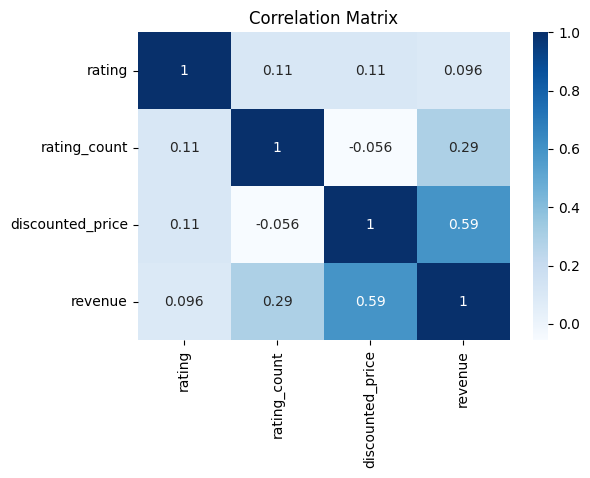

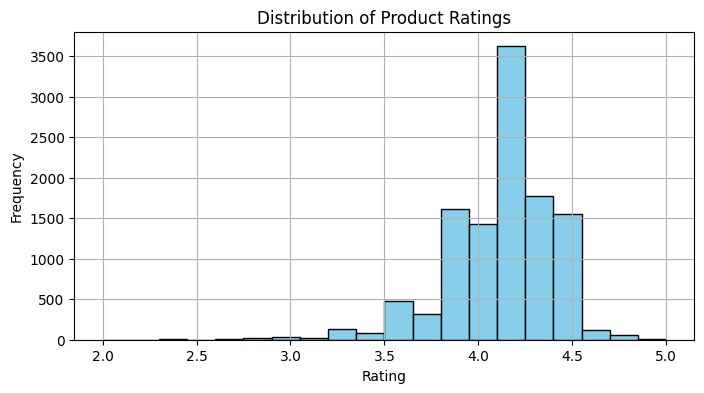

C:\Users\AKASH KRITHIK\AppData\Local\Temp\ipykernel_31200\471400091.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_rating = df.groupby('rating_bin')['revenue'].sum()


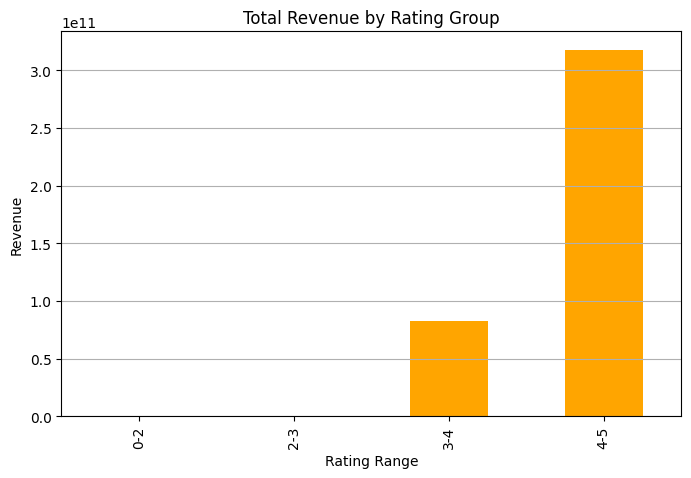

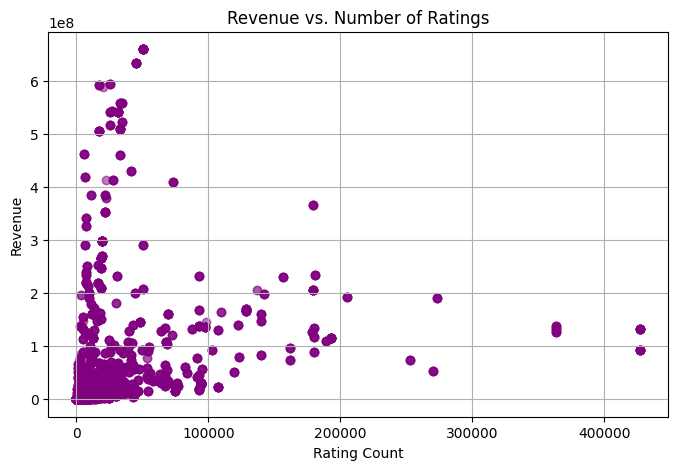


=== Hypothesis Test: Revenue vs Rating Groups ===
T-statistic: 16.6233
P-value: 0.0000
Reject H₀: High-rated products have significantly different revenue.

=== Hypothesis Test: Revenue vs Rating Count ===
Pearson Correlation: 0.2941
P-value: 0.0000
Reject H₀: There is a significant correlation between rating count and revenue.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\AKASH KRITHIK\Desktop\Amazon Sales Data Analysis\cleaned_amazon_data.csv"
df = pd.read_csv(file_path)

# Remove commas and convert to numeric
df['discounted_price'] = df['discounted_price'].astype(str).str.replace(',', '').astype(float)
df['revenue'] = df['revenue'].astype(str).str.replace(',', '').astype(float)

# Drop rows with NaN or infinite revenue
df = df.replace([float('inf'), float('-inf')], pd.NA)
df = df.dropna(subset=['rating', 'rating_count', 'discounted_price', 'revenue'])


# Step 1: Ensure all values are numeric
df['discounted_price'] = pd.to_numeric(df['discounted_price'].astype(str).str.replace(',', ''), errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Step 2: Drop rows with missing or invalid values
df = df.dropna(subset=['discounted_price', 'rating_count'])

# Step 3: Remove invalid values
df = df[(df['discounted_price'] > 0) & (df['rating_count'] >= 0)]

# Step 4: Recalculate revenue correctly
df['revenue'] = df['discounted_price'] * df['rating_count']

# Step 5: Remove extreme outliers (optional but good for analysis)
q99 = df['revenue'].quantile(0.99)
df = df[df['revenue'] <= q99]

# Step 6: Confirm
# print(df['revenue'].describe())

# === Summary Statistics ===
print("===== Summary Statistics =====")
print(df[['rating', 'rating_count', 'discounted_price', 'revenue']].describe())

# === Correlation Matrix ===
print("\n===== Correlation Matrix =====")
correlation = df[['rating', 'rating_count', 'discounted_price', 'revenue']].corr()
print(correlation)

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

# === Rating Distribution Histogram ===
plt.figure(figsize=(8, 4))
df['rating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# === Revenue by Rating Bins ===
df['rating_bin'] = pd.cut(df['rating'], bins=[0, 2, 3, 4, 5], labels=['0-2', '2-3', '3-4', '4-5'])

revenue_by_rating = df.groupby('rating_bin')['revenue'].sum()
revenue_by_rating.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Total Revenue by Rating Group')
plt.xlabel('Rating Range')
plt.ylabel('Revenue')
plt.grid(axis='y')
plt.show()

# === Scatter plot: Revenue vs Rating Count ===
plt.figure(figsize=(8, 5))
plt.scatter(df['rating_count'], df['revenue'], alpha=0.3, color='purple')
plt.title('Revenue vs. Number of Ratings')
plt.xlabel('Rating Count')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


# Hypothesis 1:
# Code (t-test for two independent groups):

from scipy.stats import ttest_ind

# Grouping
high_rated = df[df['rating'] >= 4]['revenue']
low_rated = df[df['rating'] < 4]['revenue']

# Perform t-test
t_stat, p_value = ttest_ind(high_rated, low_rated, equal_var=False)

print("\n=== Hypothesis Test: Revenue vs Rating Groups ===")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: High-rated products have significantly different revenue.")
else:
    print("Fail to reject H₀: No significant revenue difference based on rating.")

# Hypothesis 2:
# Code (Pearson correlation significance):
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df['rating_count'], df['revenue'])

print("\n=== Hypothesis Test: Revenue vs Rating Count ===")
print(f"Pearson Correlation: {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is a significant correlation between rating count and revenue.")
else:
    print("Fail to reject H₀: No significant correlation between rating count and revenue.")



=== Hypothesis Test: Revenue vs Rating Count ===
Pearson Correlation: -0.0112
P-value: 0.2297
Fail to reject H₀: No significant correlation between rating count and revenue.
